In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sys
import geopandas as gpd
import geobr

In [2]:
sys.path.append('..')

In [3]:
list_a = ['0 a 4 anos',
 '5 a 9 anos',
 '10 a 14 anos',
 '15 a 19 anos',
 '20 a 29 anos',
 '30 a 39 anos',
 '40 a 49 anos',
 '50 a 59 anos',
 '60 a 69 anos',
 '70 a 79 anos',
 '80 anos e mais']
list_b = ['(0, 4]','(4, 9]','(9, 14]','(14, 19]','(19, 29]','(29, 39]','(39, 49]','(49, 59]','(59, 69]','(69, 79]','(79,120]']
dict_ab = {list_a[i]: list_b[i] for i in range(len(list_a))}

In [4]:
list_c = ['(0, 4]',
'(4, 9]',
'(9, 14]',
 '(14, 19]',
'(19, 29]',
'(29, 39]',
'(39, 49]',
'(49, 59]',
'(59, 69]',
'(69, 79]',
'NO INFO']
list_d = ['0 (0, 4]','1 (4, 9]','2 (9, 14]','3 (14, 19]','4 (19, 29]','5 (29, 39]','6 (39, 49]','7 (49, 59]','8 (59, 69]','9 (69, 79]','NO INFO']
dict_cd = {list_c[i]: list_d[i] for i in range(len(list_c))}

In [5]:
file_path = '../Data/analyzed/basic_age_analysis.csv'
mun_path = '../Data/age_groups_municipalities.csv'
mun_2_path = '../Data/municipalities.csv'

df_file = pd.read_csv(file_path)
mun_file = pd.read_csv(mun_path)
mun_2_file = pd.read_csv(mun_2_path)

In [6]:
mun_2_file['codigo'] = mun_2_file['municipio'].astype(str).str[:6].astype(int)
mun_2_file = mun_2_file[['municipio','name','codigo','pop_21']]
df_cases = df_file.groupby(['ID_MUNICIP'])['CASOS'].sum()
df_cases = df_cases.reset_index(name = 'CASOS_T')
df_cases = df_cases.merge(mun_2_file, how = 'left', left_on = 'ID_MUNICIP', right_on = 'codigo')
df_cases = df_cases.drop(columns = ['codigo'])
df_cases['CASOS_100'] = (df_cases['CASOS_T']/df_cases['pop_21'])*(10**5)
df_cases = df_cases[['ID_MUNICIP','name','municipio','CASOS_100']]

In [7]:
mun_file = mun_file.drop(columns = ['Unnamed: 0', 'Total'])

In [8]:
mun_file = mun_file.melt(id_vars=['Municipio'], 
        var_name="age_group", 
        value_name="pop_age")

In [9]:
mun_file['age_group'] = mun_file['age_group'].replace(dict_ab)

In [10]:
df_file = df_file.merge(mun_file, how = 'left', left_on = ['ID_MUNICIP','GRUPO_IDADE'], right_on = ['Municipio', 'age_group'])

In [11]:
df_file['CASOS_POP_100'] =  (df_file['CASOS']/df_file['pop_age'])*(10**5)

In [12]:
df_new = df_file.sort_values(['ID_MUNICIP','CASOS_POP_100'], ascending=False).drop_duplicates('ID_MUNICIP').sort_index()

In [13]:
df_new = df_new.merge(df_cases,on='ID_MUNICIP')

In [14]:
df_new = df_new.sort_values(['CASOS_100'],ascending = False)
df_new = df_new.drop(columns = ['Unnamed: 0','Municipio','age_group'])

In [15]:
df_new['GRUPO_IDADE'].value_counts()

(0, 4]      478
(14, 19]    135
(19, 29]    130
(4, 9]       37
(29, 39]     31
(9, 14]      27
(39, 49]     20
(49, 59]     17
(69, 79]      1
(59, 69]      1
Name: GRUPO_IDADE, dtype: int64

## Doing the normalized maps

In [16]:
map_br = geobr.read_municipality()

C:\Users\denis\Anaconda3\lib\site-packages\geopandas\array.py:93: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  aout[:] = out
C:\Users\denis\Anaconda3\lib\site-packages\geopandas\array.py:93: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  aout[:] = out
C:\Users\denis\Anaconda3\lib\site-packages\geopandas\array.py:93: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  aout[:] = out
C:\Users\denis\Anaconda3\lib\site-packages\geopandas\array.py:93: ShapelyDeprecationWarning: __len__ for multi-p

### Age group with highest rates of cases

In [17]:
map_br = map_br.merge(df_new, how = 'left', left_on = 'code_muni', right_on = 'municipio')
map_br = map_br.fillna('NO INFO')

In [18]:
map_br['GRUPO_IDADE_2'] = map_br['GRUPO_IDADE'].replace(dict_cd)

C:\Users\denis\Anaconda3\lib\site-packages\geopandas\plotting.py:33: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for poly in geom:
C:\Users\denis\Anaconda3\lib\site-packages\descartes\patch.py:62: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  vertices = concatenate([
C:\Users\denis\Anaconda3\lib\site-packages\descartes\patch.py:64: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  [asarray(r)[:, :2] for r in t.interiors])


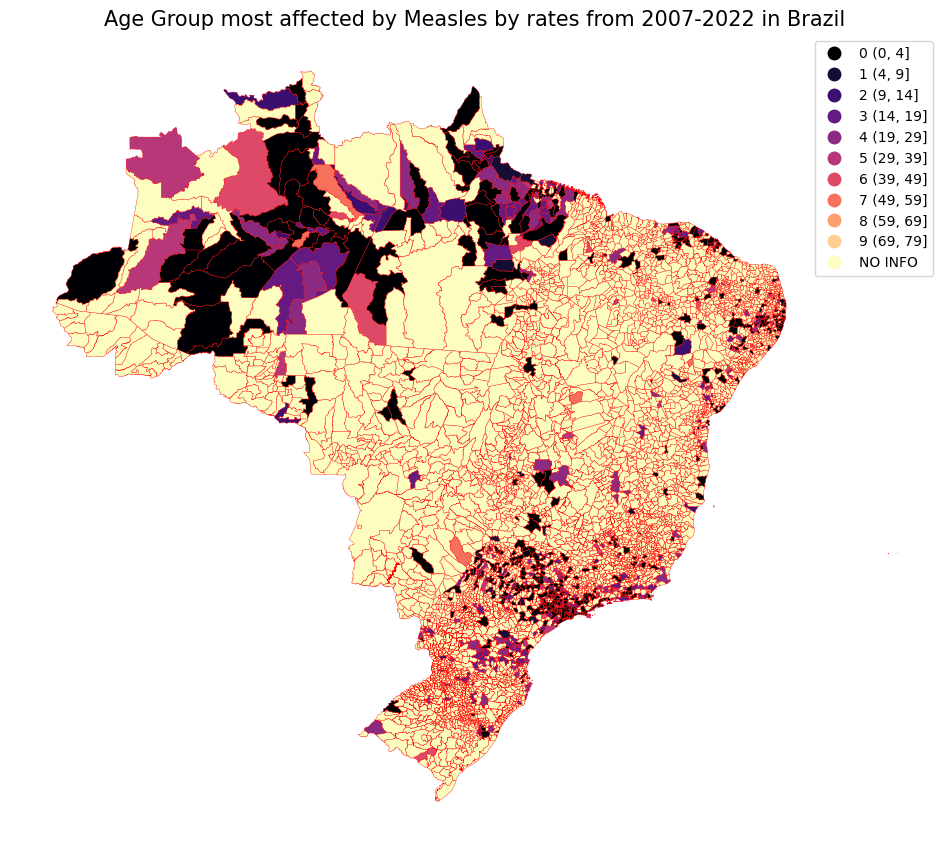

In [19]:
fig, axs = plt.subplots(figsize = (12,12))
map_br.plot(
    ax=axs, # Axis de destino do gráfico
    column="GRUPO_IDADE_2", # Coluna com os valores usados para colorir o mapa
    cmap="magma", # Mapa de cores
    edgecolor="red", # Cor dos contornos
    linewidth=0.25, # Espessura dos contornos
    legend = True,
)

axs.set_title(
    "Age Group most affected by Measles by rates from 2007-2022 in Brazil",
    fontdict={"fontsize": 15},
)

axs.axis("off") 
plt.savefig('corrected_map.pdf')
plt.show()

### Age group with highest rates of cases in the most affected states

In [20]:
map_am = geobr.read_municipality('AM')
map_rr = geobr.read_municipality('RR')
map_pa = geobr.read_municipality('PA')
map_lim = pd.concat([map_am,map_rr,map_pa])

In [21]:
map_lim = map_lim.merge(df_new, how = 'left', left_on = 'code_muni', right_on = 'municipio')
map_lim = map_lim.fillna('NO INFO')

In [22]:
map_lim['GRUPO_IDADE_2'] = map_lim['GRUPO_IDADE'].replace(dict_cd)

C:\Users\denis\Anaconda3\lib\site-packages\geopandas\plotting.py:33: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for poly in geom:
C:\Users\denis\Anaconda3\lib\site-packages\descartes\patch.py:62: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  vertices = concatenate([


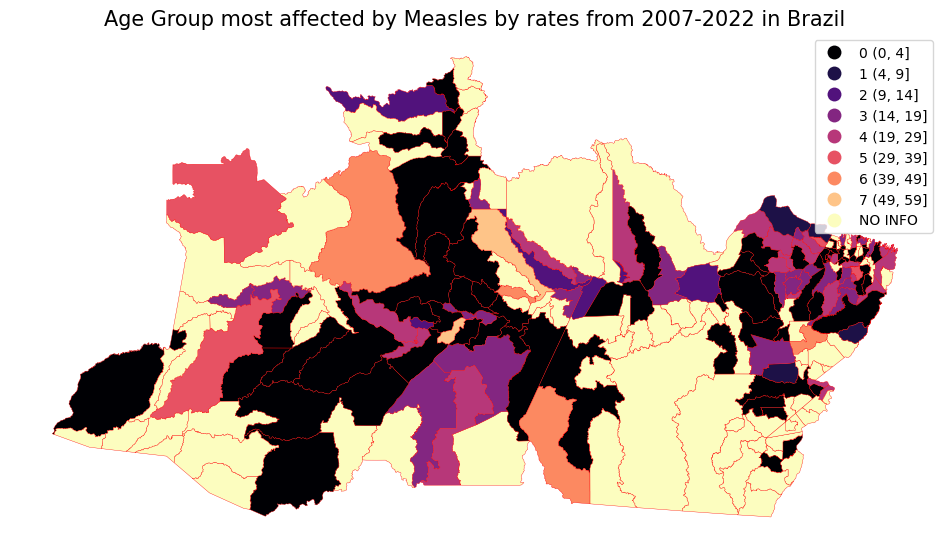

In [23]:
fig, axs = plt.subplots(figsize = (12,12))
map_lim.plot(
    ax=axs, # Axis de destino do gráfico
     column="GRUPO_IDADE_2", # Coluna com os valores usados para colorir o map
    cmap="magma", # Mapa de cores
    edgecolor="red", # Cor dos contornos
    linewidth=0.25, # Espessura dos contornos
    legend = True
)

axs.set_title(
    "Age Group most affected by Measles by rates from 2007-2022 in Brazil",
    fontdict={"fontsize": 15},
)

axs.axis("off") 
plt.savefig('corrected_lim_map.pdf')
plt.show()

In [42]:
possible_mun = map_lim[map_lim['CASOS_100'] != 'NO INFO']

In [43]:
possible_mun = possible_mun.sort_values(by = 'CASOS_POP_100',ascending = False)

In [44]:
possible_mun = possible_mun.drop(columns = ['geometry', 'GRUPO_IDADE_2','municipio','code_muni','code_state','name_muni'])

In [45]:
possible_mun

,abbrev_state,ID_MUNICIP,GRUPO_IDADE,CASOS,VAC,N_VAC,I_VAC,SG_UF_NOT,pop_age,CASOS_POP_100,name,CASOS_100
35,AM,130250.0,"(0, 4]",327.0,63.0,264.0,0.0,13.0,10447.0,3130.085192,Manacapuru,896.469336
62,RR,140002.0,"(9, 14]",19.0,10.0,9.0,0.0,14.0,1396.0,1361.031519,Amajari,685.790133
32,AM,130220.0,"(0, 4]",24.0,8.0,16.0,0.0,13.0,2013.0,1192.250373,Juruá,367.8606
37,AM,130260.0,"(0, 4]",2021.0,386.0,1529.0,106.0,13.0,173176.0,1167.020834,Manaus,323.817114
72,RR,140045.0,"(0, 4]",28.0,7.0,16.0,5.0,14.0,2802.0,999.286224,Pacaraima,288.442411
...,...,...,...,...,...,...,...,...,...,...,...,...
176,PA,150613.0,"(0, 4]",1.0,0.0,1.0,0.0,15.0,6234.0,16.041065,Redenção,1.1584
119,PA,150280.0,"(19, 29]",1.0,0.0,1.0,0.0,15.0,6510.0,15.360983,Curralinho,2.814523
132,PA,150345.0,"(14, 19]",1.0,0.0,0.0,1.0,15.0,7187.0,13.914011,Ipixuna do Pará,2.97752
55,AM,130406.0,"(0, 4]",1.0,1.0,0.0,0.0,13.0,8238.0,12.138869,Tabatinga,1.459811


In [47]:
possible_mun[:30]

,abbrev_state,ID_MUNICIP,GRUPO_IDADE,CASOS,VAC,N_VAC,I_VAC,SG_UF_NOT,pop_age,CASOS_POP_100,name,CASOS_100
35,AM,130250.0,"(0, 4]",327.0,63.0,264.0,0.0,13.0,10447.0,3130.085192,Manacapuru,896.469336
62,RR,140002.0,"(9, 14]",19.0,10.0,9.0,0.0,14.0,1396.0,1361.031519,Amajari,685.790133
32,AM,130220.0,"(0, 4]",24.0,8.0,16.0,0.0,13.0,2013.0,1192.250373,Juruá,367.8606
37,AM,130260.0,"(0, 4]",2021.0,386.0,1529.0,106.0,13.0,173176.0,1167.020834,Manaus,323.817114
72,RR,140045.0,"(0, 4]",28.0,7.0,16.0,5.0,14.0,2802.0,999.286224,Pacaraima,288.442411
183,PA,150640.0,"(14, 19]",8.0,0.0,5.0,3.0,15.0,902.0,886.91796,Santa Cruz do Arari,285.823171
91,PA,150110.0,"(0, 4]",30.0,2.0,27.0,1.0,15.0,4200.0,714.285714,Bagre,247.129853
80,PA,150030.0,"(19, 29]",55.0,5.0,49.0,1.0,15.0,7704.0,713.914849,Afuá,338.261087
140,PA,150405.0,"(19, 29]",36.0,5.0,19.0,12.0,15.0,5256.0,684.931507,Mãe do Rio,250.090493
104,PA,150180.0,"(0, 4]",76.0,6.0,59.0,11.0,15.0,11935.0,636.782572,Breves,189.873418
